## Learning fair representations (LFR) vs Fairness Beyond Disparate Treatment & Disparate Impact: Learning Classification without Disparate Mistreatment (DM and DM-sen)

Today, we will explore the methods of unfairness problem in Machine Learning. Since ProPublica organization pointed out that COMPAS (Correctional Offender Management Profiling for
Alternative Sanctions), a criminal history database, discriminates against race and gender. 
https://www.propublica.org/datastore/dataset/compas-recidivism-riskscore-data-and-analysis

For example, its analysis shows that Black defendants were often predicted to be at a higher risk of recidivism than they actually were, while white defendants were expected to be less risky. Recidivism is defined as a new arrest within two years. And the risk scores evaluated by their system result in unfairness between the defendant's recidivism situation.



In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
%%capture
%run ../lib/LFR_model.ipynb
%run ../lib/DM_DM_sen_Model.ipynb

Data Preprocessing: From the ProPublica notebook, we removed the rows that 
1. charge date of a defendants Compas scored crime was not within 30 days from when the person was arrested
2. the recidivist flag - is_recid == -1 if we could not find a compas case at all
3. those with a c_charge_degree of 'O' which means ordinary traffic offenses. It will not result in Jail time are removed 
4. since we are only intersted in sample fairness between two races: African-American and Caucasian, we subsets our datasets

Here we introduce Learning Fair Representations techiniques to solve unfairness problem, the learning algorithm for fair classification is achieved by formulating fairness as optimization problem of finding good representation. The main idea in this model is to map each individual, represented as a data point in a given input space, to a probability distribution in a new representation space. General speaking, the goal of our model is to learn a good prototype set with the consideration of accuracy and statiscal parity.

Reference: Rich Zemel, Yu Wu, Kevin Swersky, Toni Pitassi, Cynthia Dwork, Learning Fair Representations,
http://proceedings.mlr.press/v28/zemel13.html

Before we built the LFR model, we first transform each variable to a learnable indicator value. And according to the research paper, defandants with African-American race are regarded as non-sensitive group , Caucasian defandants are regarded as protected group. 

As defined in the Learning Fair Representation paper, the Loss function **L = A_z * L_z+ A_x * L_x + A_y * L_y**, where **Ax, Ay, Az** are hyper-parameters governing the trade-off between the system's desire data, And relative **Lz, Lx, Ly** are defined as follows

![title](../figs/3.png)

![title](../figs/4.png)

![title](../figs/5.png)

Therefore we defined the following function to calculate the relative value. And here we use scipy.optimizeo package to minimize our Loss function.  

We split the protected group and unprotected group first and concatenate them together. Traning sets and testing sets are split proportionally as 6:1, you can see how does each defandants variables are being rescaled and manipulated 

The results of the LFR model versus a logistic regression are:

In [6]:
return_lfr_accuracy()

the overall test accuracy for LFR is: 47.54%
the test accuracy for LFR for sensitive: 48.1%
the test accuracy for LFR for nonsensitive: 47.17%
the test accuracy for logistic regression is: 67.09%
the test accuracy for logistic regression for sensitive is: 64.56%
the test accuracy for logistic regression for nonsensitive is: 64.57000000000001%


**Learning Classification without Disparate Mistreatment**

Here we introduce Learning Classification without Disparate Mistreatment techniques to solve unfairness problems. These methods avoid disparate treatment and disparate mistreatment simultaneously. In particular, DM is avoided by using fairness constraints, while disparate treatment is avoided by ensuring that sensitive attribute information is not used while making decisions, i.e., by keeping user feature vectors (x) and the sensitive features (z) disjoint.
In addition, we implement a method to avoid disparate mistreatment only (DM-sen). The user feature vectors (x) and the sensitive features (z) are not disjoint, that is, z is used as a learnable feature. Therefore, the sensitive attribute information is used for decision-making, resulting in disparate treatment.


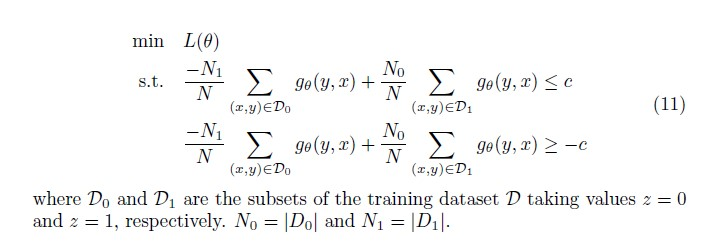

The results of the DM & DM-sen models versus the baseline are:

In [7]:
return_dm_accuracy()

== Unconstrained (original) classifier ==


Accuracy: 0.649
||  s  || FPR. || FNR. ||
||  0  || 0.21 || 0.49 ||
||  1  || 0.25 || 0.48 ||




== Constraints on FPR ==


Accuracy: 0.649
||  s  || FPR. || FNR. ||
||  0  || 0.21 || 0.49 ||
||  1  || 0.25 || 0.48 ||




### Explanation and Interpretation of Results 

As noted above the accuracy for a basic logistic model is about 67% overall and 64.6% for sensitive and non-sensitive groups, the accuracy for the LFR model is 47.54% and the accuracy of the DM/DM-sen model was 64.9%. 
A decrease in accuracy when implementing fair classification is to be expected, particularly in this case where our initial data is an imbalanced dataset. This brings up a couple of problems. There could be sampling bias, which is a situation in which the labeled training data was from a non-representative sample of the population. There might also be label bias which is a situation in which the labeled training data contains samples that were mis-labeled in a way that correlates with being part of a sensitive group.The data can be purposefully unfair and imperfect, making things more fair does not necessarily make things more accurate. There are simply other factors to take into account. 

The disparate mistreatment model is intended to bridge the gap created by this imbalance and under-representation of minority groups, and inaccuracy of classification of data that is not necessarily linearly seperable. In terms of accuracy it was about on-par with the logistic regression models of the sensitive and nonsensitive groups, if not a little higher but lover than the logistic regression of the data overall. This makes sense, the DM model should have higher accuracy than the LFR model since it accounts for disparate mistreatment but lower accuracy than the baseline model due to possible bias.

In [ ]:
!jupyter nbconvert --to pdf main.ipynb